In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import validation_curve
from sklearn.metrics import f1_score
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             confusion_matrix, log_loss)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

We develop here how we have treated the data in order to fit the model ini the best way possible using KNN

In [3]:
df_train = pd.read_csv('data/train.csv')
df_train.dropna(subset=['Y'], inplace=True)

X = df_train.drop('Y', axis = 1)
y = df_train['Y']


X_test_prueb = pd.read_csv('data/Xtest.csv')
df_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,Y
0,3215.0,206.0,8.0,127.0,14.0,5588.0,215.0,248.0,168.0,1057.0,T1,T29,1.0
1,3022.0,18.0,7.0,0.0,0.0,3012.0,215.0,226.0,148.0,1476.0,T1,T23,1.0
2,3008.0,18.0,19.0,382.0,92.0,4715.0,201.0,197.0,127.0,3616.0,T1,T29,1.0
3,2595.0,296.0,24.0,85.0,28.0,1252.0,144.0,224.0,216.0,780.0,T3,T33,6.0
4,3261.0,87.0,4.0,42.0,-2.0,3719.0,226.0,233.0,142.0,3784.0,T1,T38,7.0


In [4]:
X = X.astype({'X11':'category', 'X12': 'category'})
X_test_prueb = X_test_prueb.astype({'X11':'category', 'X12':'category'})

We split our initial trainning set in order to have the chance of testing how the model predicts in new data, also to aviod having overfitting.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
columna = ['X11']
imputer = SimpleImputer(strategy='most_frequent')

X_train[columna] = imputer.fit_transform(X_train[columna])
X_test[columna] = imputer.fit_transform(X_test[columna])

X_train_cat = pd.DataFrame(X_train[columna])
X_test_cat = pd.DataFrame(X_test[columna])

columnas = ['X1', 'X3','X4', 'X6', 'X10']

# Rellenar los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_train[columnas] = imputer.fit_transform(X_train[columnas])
X_test[columnas] = imputer.fit_transform(X_test[columnas])

# Convertir a un array de numpy
X_train_sub = pd.DataFrame(X_train[columnas])
X_test_sub = pd.DataFrame(X_test[columnas])

In [9]:
X_train_num  = X_train_sub[['X1', 'X3','X4','X6','X10']]
X_train_cat = X_train[['X11']]
X_test_num = X_test_sub[['X1', 'X3','X4', 'X6','X10']]
X_test_cat = X_test[['X11']]




ohe = OneHotEncoder(sparse=False)
X_train_categorical_encoded = ohe.fit_transform(X_train_cat)
X_test_cat_encoded = ohe.fit_transform(X_test_cat)


#The real test
X_test_prueb_num = X_test_prueb[['X1', 'X3','X4' ,'X6', 'X10']]
X_test_prueb_cat = X_test_prueb[['X11']]
X_prueb_cat_encoded = ohe.fit_transform(X_test_prueb_cat)

X_test_final = np.concatenate((X_test_prueb_num, X_prueb_cat_encoded), axis=1)



X_train_sub = np.concatenate((X_train_num, X_train_categorical_encoded), axis=1)
X_test_num = np.concatenate((X_test_num, X_test_cat_encoded), axis=1)

c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\cmari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Running Knn with 2 neighbours
Training log-loss : 3.365009088447409
Accuracy: 0.7958656330749354


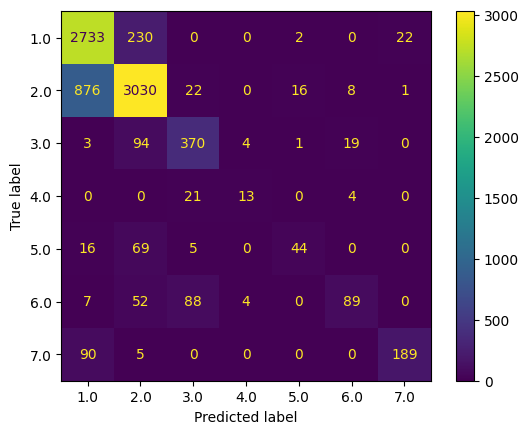

Running Knn with 3 neighbours
Training log-loss : 2.1590797040047875
Accuracy: 0.8087855297157622


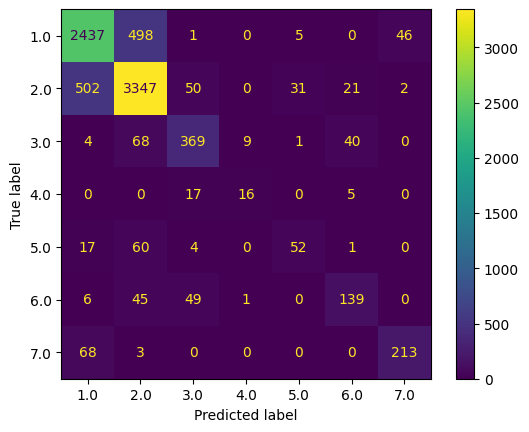

Running Knn with 5 neighbours
Training log-loss : 1.2529110190715014
Accuracy: 0.8015257782699643


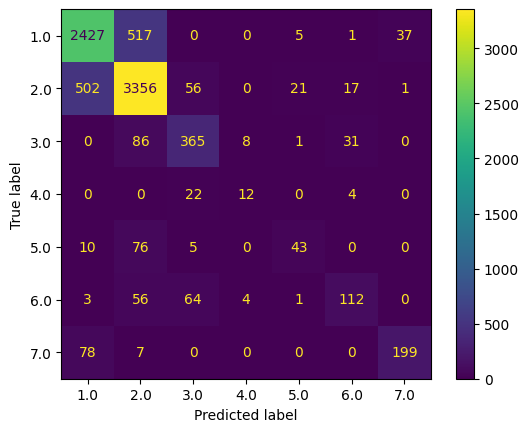

Running Knn with 10 neighbours
Training log-loss : 0.7187130404332573
Accuracy: 0.7787621508551741


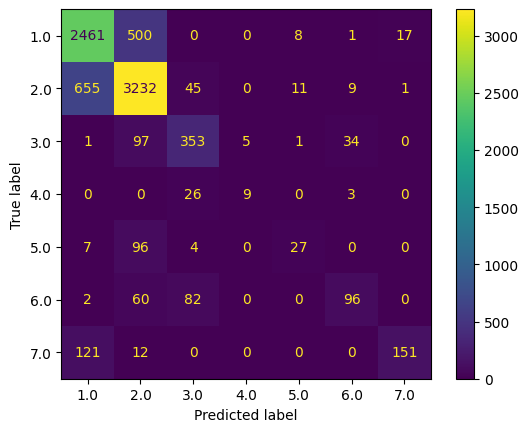

Running Knn with 15 neighbours
Training log-loss : 0.6528882223269552
Accuracy: 0.7665805340223945


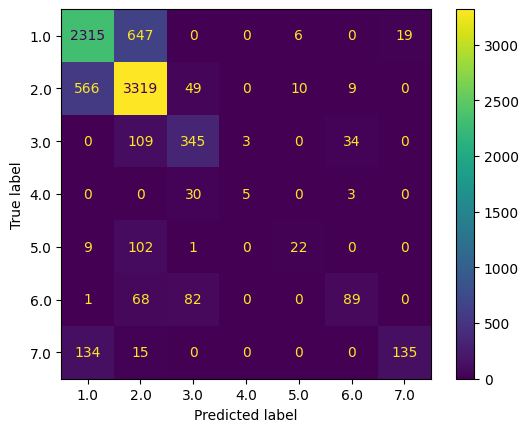

Running Knn with 20 neighbours
Training log-loss : 0.6199953407022158
Accuracy: 0.7550141503629876


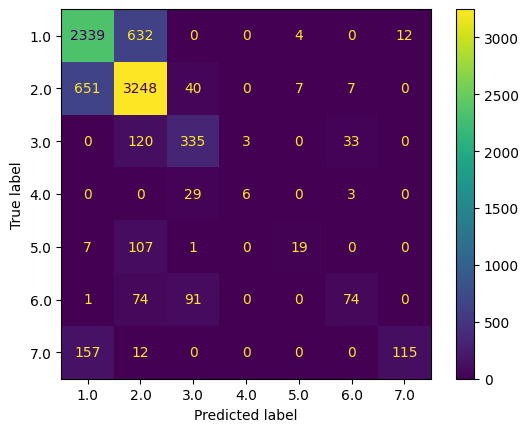

Running Knn with 40 neighbours
Training log-loss : 0.5984720629217543
Accuracy: 0.7375415282392026


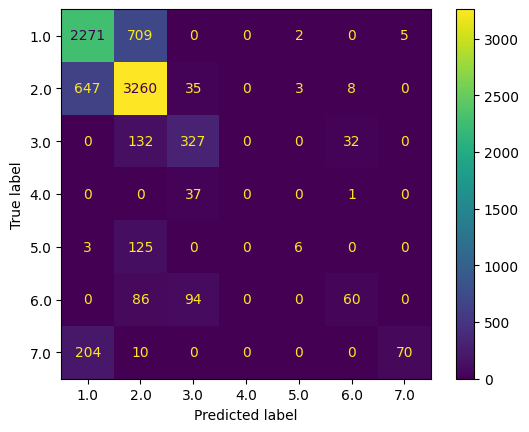

Running Knn with 80 neighbours
Training log-loss : 0.6511868840482744
Accuracy: 0.7198228128460686


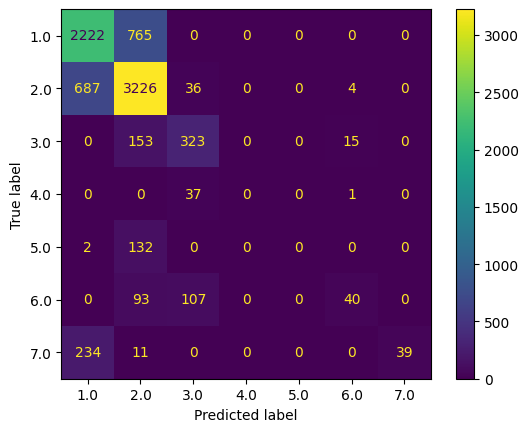

Running Knn with 100 neighbours
Training log-loss : 0.6701196175536545
Accuracy: 0.7129322013042944


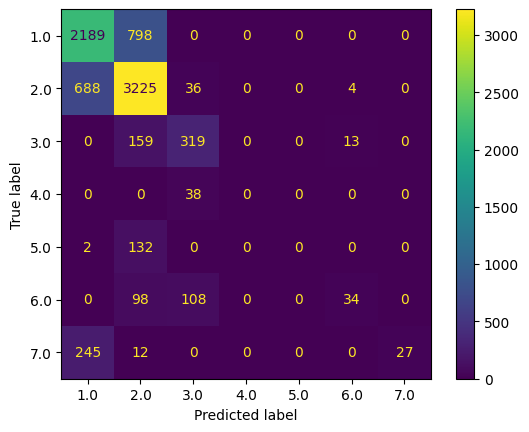

In [24]:
neighbors = [2, 3, 5, 10, 15, 20, 40, 80, 100]
log_losses = []
accuracies = []
for i in neighbors:
    print("Running Knn with "+str(i)+" neighbours")
    model = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=2)
    

    model.fit(X_train_sub, y_train)
    #Compute the predicted probabilit  y for each class on the training set and evaluate on the log-loss.

    pred_prob_test = pd.DataFrame(model.predict_proba(X_test_num))
    loss = log_loss(y_test, pred_prob_test)
    log_losses.append(loss)
    print(f'Test log-loss : {loss}')
    
    # We measure the test accuracy and log score.
    y_pred = model.predict(X_test_num)
    test_accuracy = accuracy_score(y_pred, y_test)
    accuracies.append(test_accuracy)
    print('Accuracy:', test_accuracy)

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()


    #Predict on the test predictors, and save the probabilities to a csv file. 
    
 

We plot the log Loss and accuracy in orther to fix the best parameter for the model

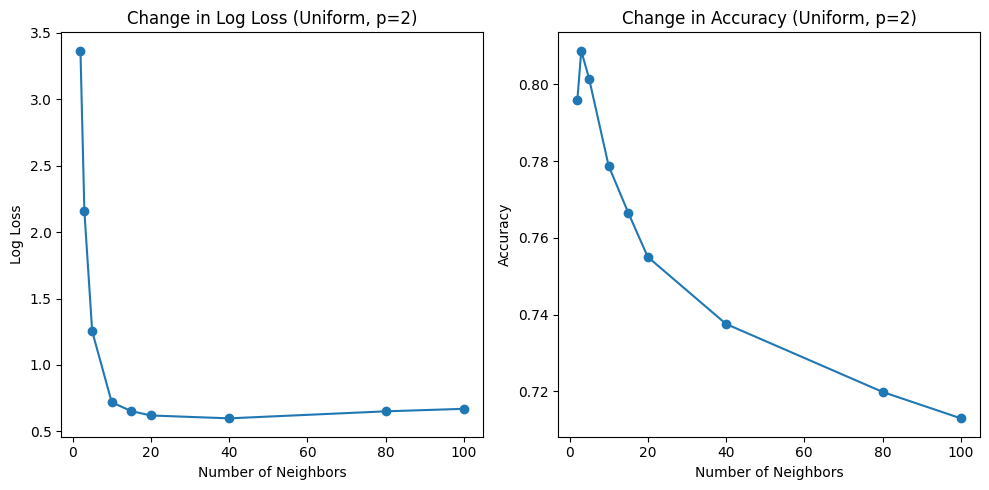

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(neighbors, log_losses, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Log Loss')
plt.title('Change in Log Loss (Uniform, p=2)')

plt.subplot(1, 2, 2)
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy (Uniform, p=2)')

plt.tight_layout()
plt.show()

In [13]:
pred_prob_testf = pd.DataFrame(model.predict_proba(X_test_final))

model = KNeighborsClassifier(n_neighbors=20, weights='uniform', p=2)
pred_prob_testf.rename(columns = {0: 'Y_1', 1: 'Y_2', 2: 'Y_3', 3: 'Y_4', 4: 'Y_5', 5:'Y_6', 6:'Y_7'}, inplace = True)
idx = pred_prob_testf.index
pred_prob_testf.insert(0, 'id', idx)
pred_prob_testf.head()

,id,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7
0,0,0.32,0.68,0.00,0.0,0.0,0.00,0.00
1,1,0.24,0.75,0.00,0.0,0.0,0.01,0.00
2,2,0.40,0.60,0.00,0.0,0.0,0.00,0.00
3,3,0.10,0.86,0.01,0.0,0.0,0.03,0.00
4,4,0.56,0.33,0.00,0.0,0.0,0.00,0.11
